In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("kredi_data.csv")

In [3]:
df

,Unnamed: 0,aylık_gelir,kredi_limiti,kredi_skoru,kredi_kartı_sayısı,yaş,eğitim,cinsiyet,öğrenci,evli,etnik_köken,bakiye
0,0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          400 non-null    int64  
 1   aylık_gelir         400 non-null    float64
 2   kredi_limiti        400 non-null    int64  
 3   kredi_skoru         400 non-null    int64  
 4   kredi_kartı_sayısı  400 non-null    int64  
 5   yaş                 400 non-null    int64  
 6   eğitim              400 non-null    int64  
 7   cinsiyet            400 non-null    object 
 8   öğrenci             400 non-null    object 
 9   evli                400 non-null    object 
 10  etnik_köken         400 non-null    object 
 11  bakiye              400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [5]:
df.drop("Unnamed: 0",axis=1 , inplace=True)

In [6]:
df.isnull().sum()

aylık_gelir           0
kredi_limiti          0
kredi_skoru           0
kredi_kartı_sayısı    0
yaş                   0
eğitim                0
cinsiyet              0
öğrenci               0
evli                  0
etnik_köken           0
bakiye                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
sayisal_sutunlar=["aylık_gelir","kredi_limiti","kredi_skoru","kredi_kartı_sayısı","yaş","eğitim","bakiye"]
sayisal_olmayan=["cinsiyet","öğrenci","evli","etnik_köken"]

In [9]:
df[sayisal_sutunlar].describe()

,aylık_gelir,kredi_limiti,kredi_skoru,kredi_kartı_sayısı,yaş,eğitim,bakiye
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [10]:
df[sayisal_olmayan].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cinsiyet     400 non-null    object
 1   öğrenci      400 non-null    object
 2   evli         400 non-null    object
 3   etnik_köken  400 non-null    object
dtypes: object(4)
memory usage: 12.6+ KB


In [11]:
df[sayisal_olmayan].describe()

,cinsiyet,öğrenci,evli,etnik_köken
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


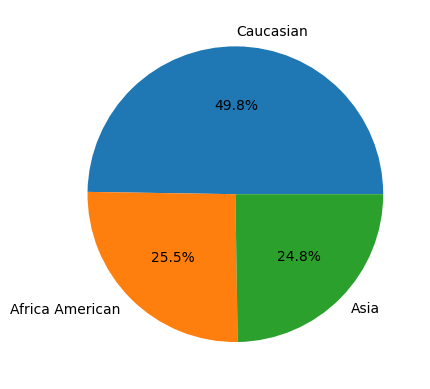

In [12]:
plt.pie(df["etnik_köken"].value_counts(), labels = ["Caucasian", "Africa American","Asia"],autopct='%1.1f%%')
plt.show()

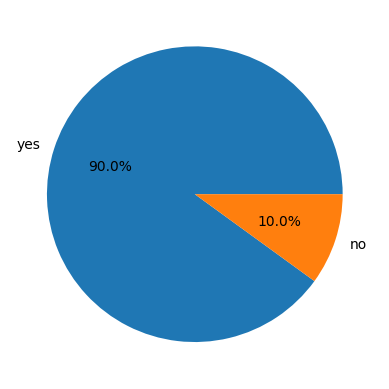

In [13]:
plt.pie(df['öğrenci'].value_counts(), labels = ['yes', 'no'],autopct='%1.1f%%')
plt.show()

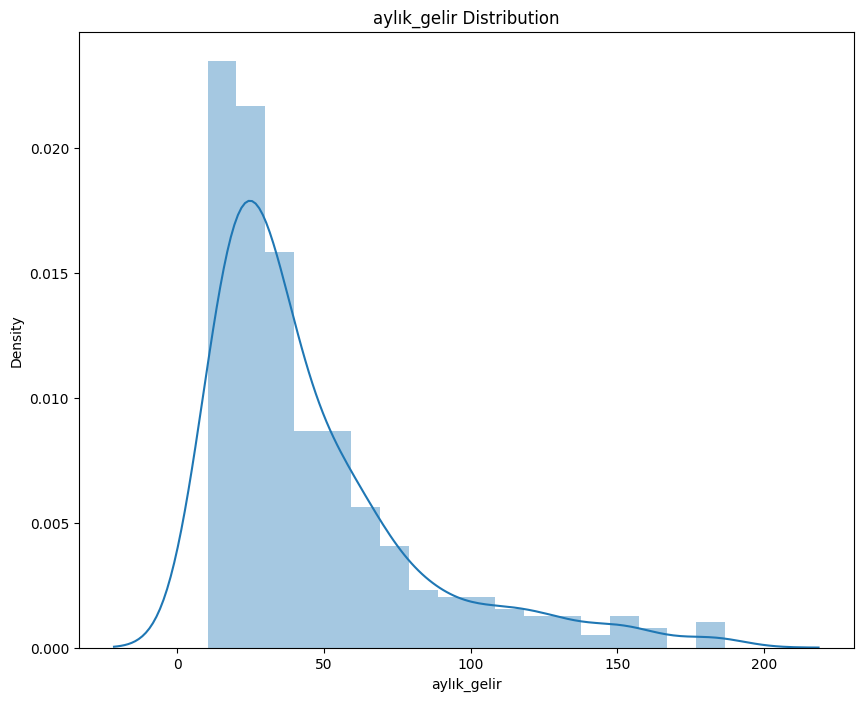

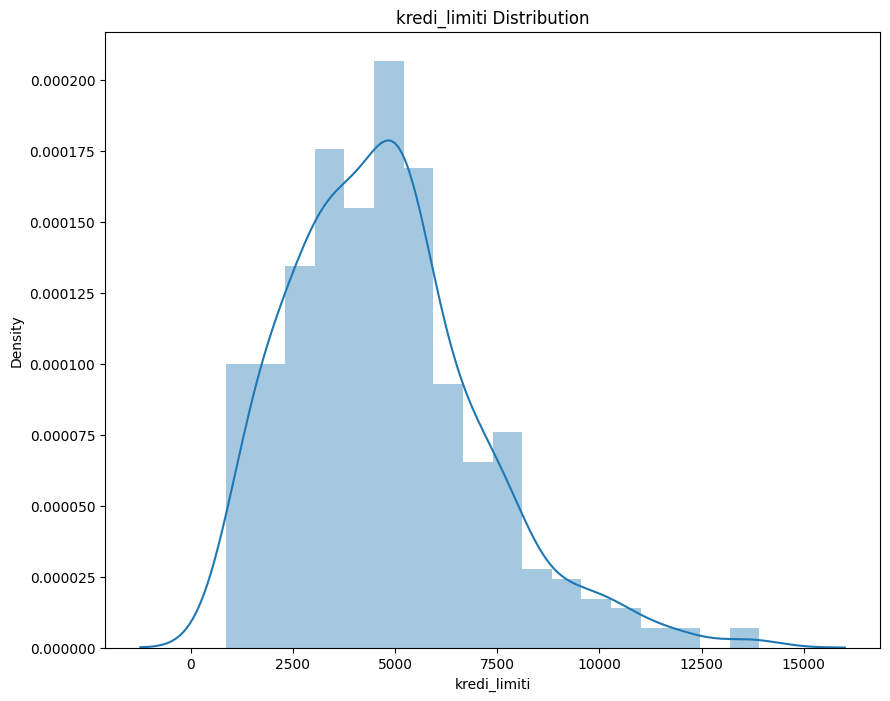

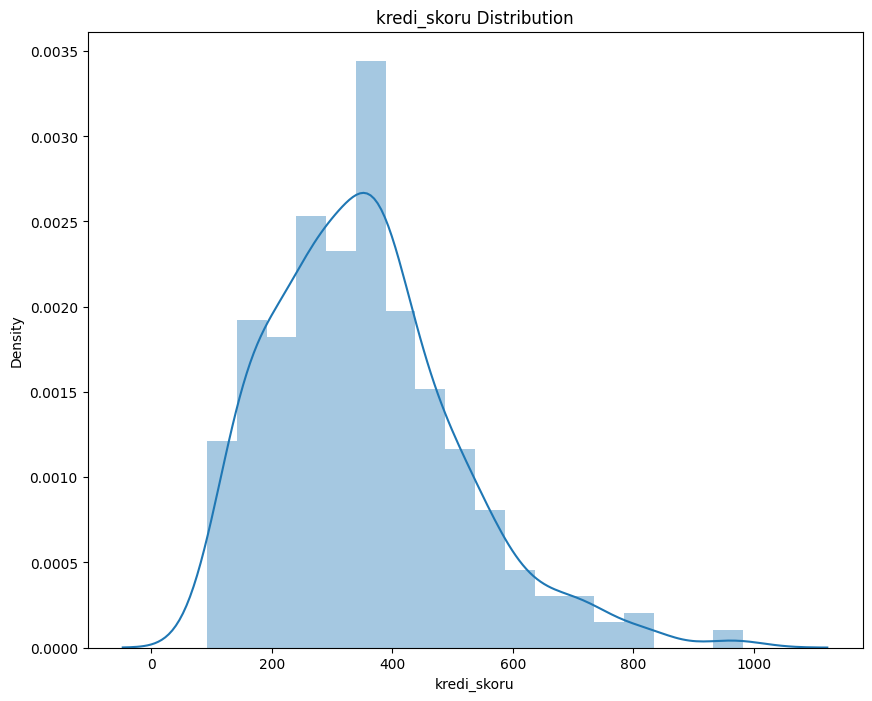

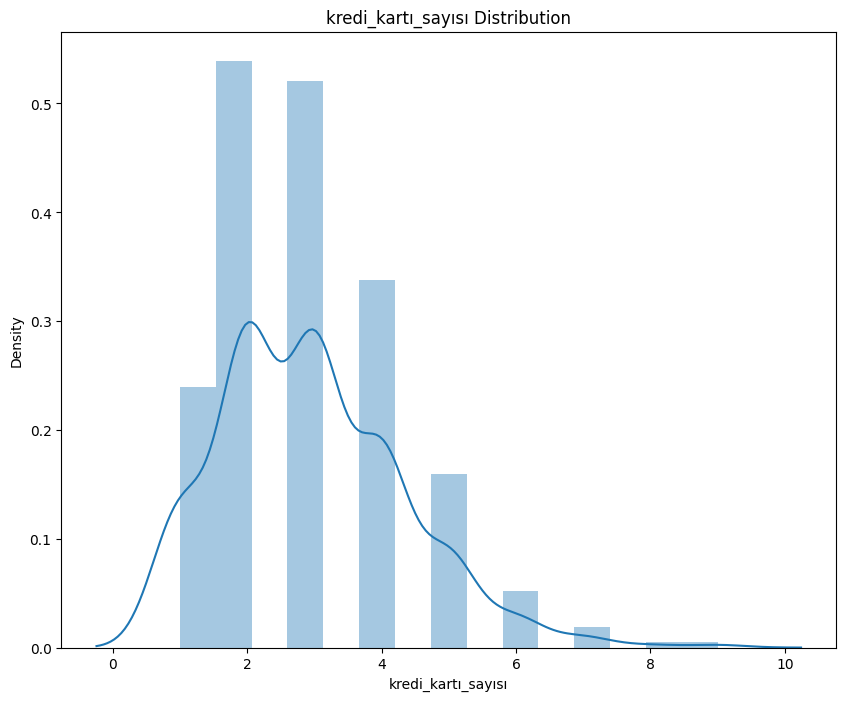

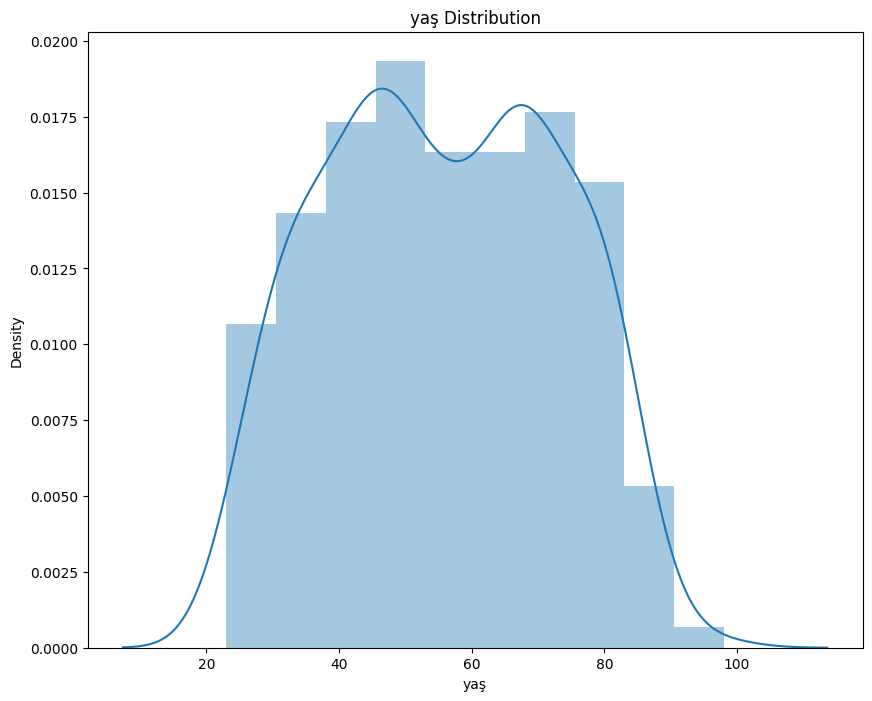

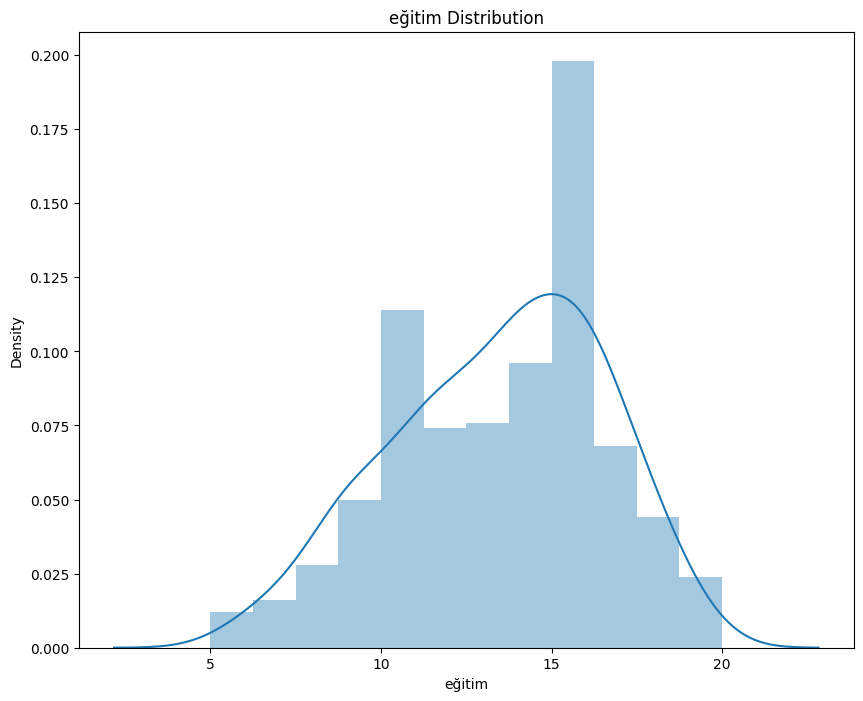

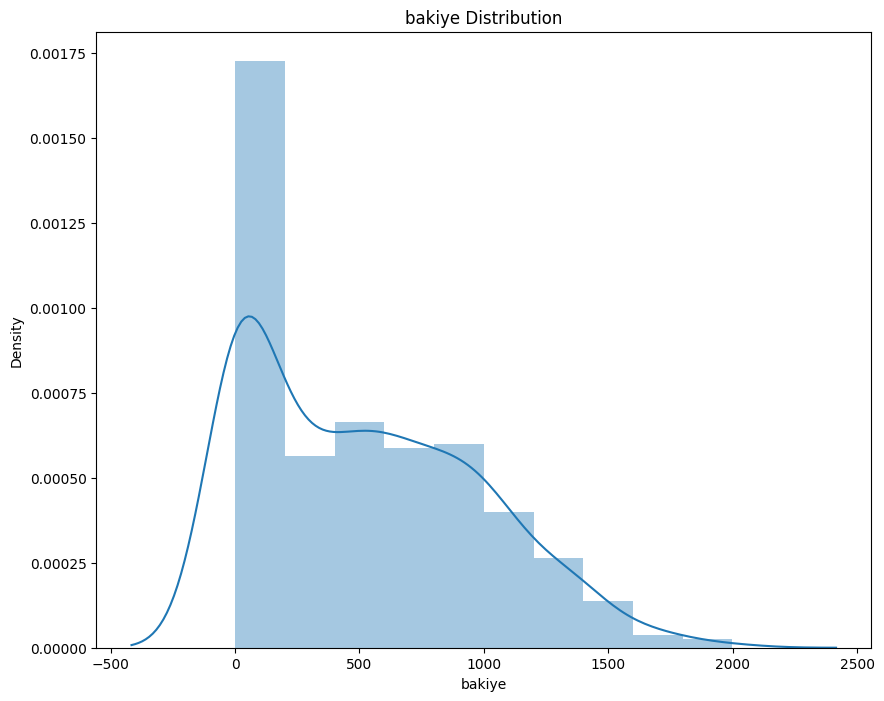

In [14]:
for i in sayisal_sutunlar:
 fig,ax = plt.subplots(figsize=(10,8))
 ax = sns.distplot(df[i])
 ax.set_title(i+' Distribution')
 plt.show()

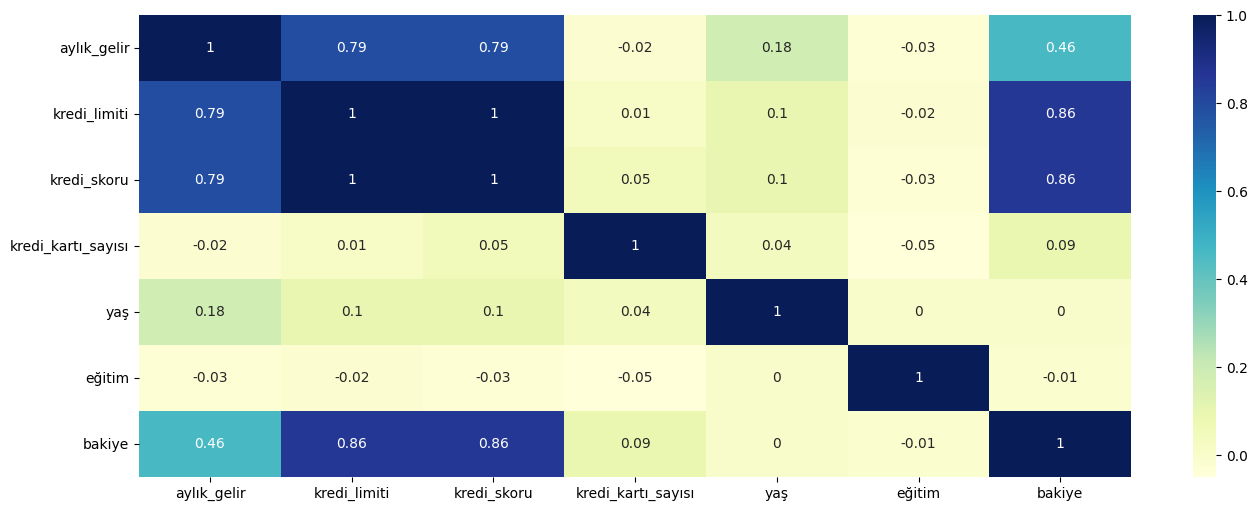

In [15]:
plt.figure(figsize=(16, 6))
dataplot = sns.heatmap(df[sayisal_sutunlar].corr().round(2), cmap="YlGnBu", annot=True)
plt.show()

In [16]:
##verimeze kukla değişkenler olurşturma
df = pd.get_dummies(df,drop_first=True)

In [17]:
#Normalizyon
df_normalize = df.copy()
df_normalize[sayisal_sutunlar]=preprocessing.minmax_scale(df[sayisal_sutunlar])
df_normalize

,aylık_gelir,kredi_limiti,kredi_skoru,kredi_kartı_sayısı,yaş,eğitim,bakiye,cinsiyet_Female,öğrenci_Yes,evli_Yes,etnik_köken_Asian,etnik_köken_Caucasian
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.166583,False,False,True,False,True
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.451726,True,True,True,True,False
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.290145,False,False,False,True,False
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.482241,True,False,False,True,False
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.165583,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.009882,0.248507,0.240720,0.250,0.120000,0.533333,0.280140,False,False,True,False,True
396,0.017075,0.228442,0.228346,0.500,0.560000,0.800000,0.240120,False,False,False,False,False
397,0.269560,0.253944,0.256468,0.500,0.586667,0.466667,0.069035,True,False,True,False,True
398,0.155287,0.127891,0.111361,0.000,0.280000,0.533333,0.000000,False,False,True,False,True


In [18]:
#Standardizasyon
df_standardizasyon = df.copy()
stdandard_scale = preprocessing.StandardScaler()
df_standardizasyon[sayisal_sutunlar]=stdandard_scale.fit_transform(df[sayisal_sutunlar])
df_standardizasyon

,aylık_gelir,kredi_limiti,kredi_skoru,kredi_kartı_sayısı,yaş,eğitim,bakiye,cinsiyet_Female,öğrenci_Yes,evli_Yes,etnik_köken_Asian,etnik_köken_Caucasian
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,-0.407277,False,False,True,False,True
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.834056,True,True,True,True,False
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.130634,False,False,False,True,False
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.966900,True,False,False,True,False
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,-0.411633,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.940986,-0.275711,-0.310230,0.031032,-1.373763,-0.144171,0.087078,False,False,True,False,True
396,-0.904963,-0.389362,-0.381413,1.491355,0.541698,1.137347,-0.087144,False,False,False,False,False
397,0.359462,-0.244913,-0.219633,1.491355,0.657787,-0.464550,-0.831944,True,False,True,False,True
398,-0.212808,-0.958916,-1.054419,-1.429291,-0.677231,-0.144171,-1.132477,False,False,True,False,True


	##Normalizasyon yapılmış veriye göre

In [19]:
X = df_normalize[["aylık_gelir","kredi_limiti","kredi_kartı_sayısı","yaş","eğitim","bakiye","cinsiyet_Female",
		"öğrenci_Yes","evli_Yes","etnik_köken_Asian","etnik_köken_Caucasian"]]
y = df_normalize["kredi_skoru"]

In [20]:
X_test , X_train, y_test, y_train = train_test_split(X,y,test_size=0.25,random_state=11)

In [21]:
knn = KNeighborsRegressor()

In [22]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [23]:
training_data_prediction_score = knn.score(X_train, y_train)
test_data_prediction_score = knn.score(X_test, y_test)
print(training_data_prediction_score,test_data_prediction_score)

0.6766895275396694 0.4222924089143837


Burda düşük bir skor aldığım için kullanmaktan vazgeçtim 

	##Standardisazyon yapılmış veri seti

In [24]:
X = df_standardizasyon[["aylık_gelir","kredi_limiti","kredi_kartı_sayısı","yaş","eğitim","bakiye","cinsiyet_Female",
		"öğrenci_Yes","evli_Yes","etnik_köken_Asian","etnik_köken_Caucasian"]]
y = df_standardizasyon["kredi_skoru"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [26]:
knn = KNeighborsRegressor()

In [27]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [28]:
training_data_prediction_score = knn.score(X_train, y_train)
test_data_prediction_score = knn.score(X_test, y_test)
print(training_data_prediction_score,test_data_prediction_score)

0.953860453555362 0.9450315772559278


In [29]:
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
MSE_train =mean_squared_error(y_train,y_train_pred)
print(MSE_train)
MSE_test =mean_squared_error(y_test,y_test_pred)
print(MSE_test)


0.04736942716987778
0.04904625857413002


In [31]:
MRSE_train =MSE_train**0.5
print(MRSE_train)
MRSE_test =MSE_test**0.5
print(MRSE_test)

0.21764518641559197
0.22146389903126426


In [32]:
train_score = {}
test_score = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
 knn = KNeighborsRegressor(n_neighbors=neighbor)
 knn.fit(X_train, y_train)
 train_score[neighbor] = mean_squared_error(knn.predict(X_train), y_train)
 test_score[neighbor] = mean_squared_error(knn.predict(X_test), y_test)


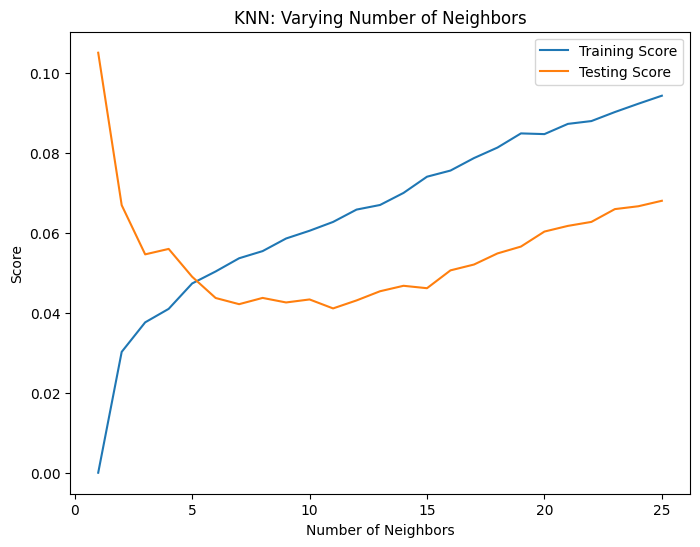

In [33]:

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, list(train_score.values()), label="Training Score")
plt.plot(neighbors, list(test_score.values()), label="Testing Score")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.show()


In [34]:
knn_tuned = KNeighborsRegressor(n_neighbors=6)
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [35]:
# modelin tahmin kalite skorları
train_score = knn_tuned.score(X_train, y_train)
print(train_score)
test_score = knn_tuned.score(X_test, y_test)
print(test_score)

0.9509363900938348
0.9509845433692358


In [36]:
train=pd.DataFrame(y_train)
train['prediction']=y_train_pred
train


,kredi_skoru,prediction
313,1.158735,1.227330
21,0.666923,0.516791
222,0.621624,0.477964
350,-1.293854,-1.196785
398,-1.054419,-0.993590
...,...,...
309,0.899886,0.752343
386,-0.439654,-0.022908
140,0.673394,0.516791
301,-0.426712,-0.364588


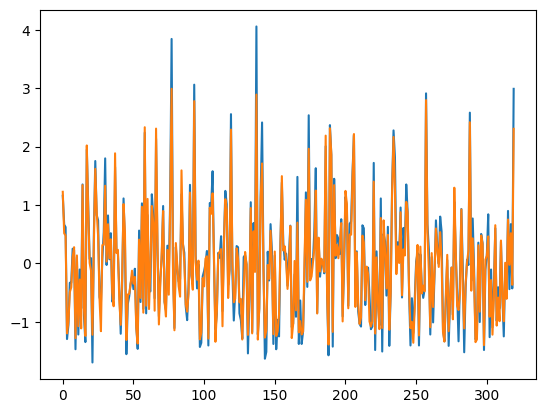

In [37]:
plt.plot(train.values)
plt.show()

In [38]:
test=pd.DataFrame(y_test)
test['prediction']=y_test_pred
test


,kredi_skoru,prediction
35,-0.873225,-0.983236
316,1.081080,0.630684
281,-1.112660,-0.809807
74,0.408074,0.197113
296,0.097456,0.070277
...,...,...
188,1.288159,1.214387
245,-1.073833,-0.754155
118,-1.177372,-1.169606
272,-0.361999,-0.242929


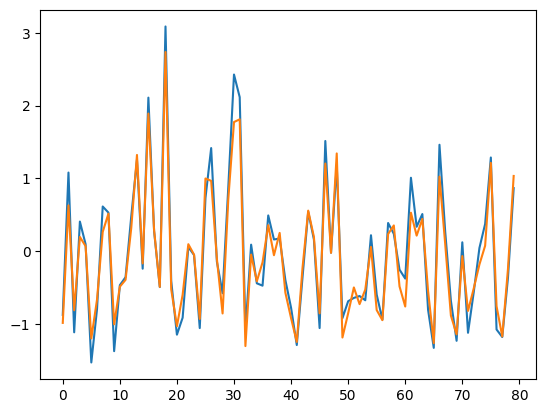

In [39]:
plt.plot(test.values)
plt.show()

##Tahminleme

In [40]:
knn_tuned.predict(pd.DataFrame([[100,5000,2,23,15,450,0,1,0,1,0],[350,6000,3,30,19,650,1,0,1,0,1],
				  [35 ,1000,2,35,8,300,0,0,0,0,0]]))

array([3.23707158, 3.24138572, 3.23707158])